# Import Libraries

In [1]:
import shap
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Set SHAP Visualization in notebook

shap.initjs()

# Load Data and Models

In [3]:
# Load the trained model

model_rf = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")
model_xgb = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")

In [4]:
data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

In [5]:
x = data.drop("loan_status", axis = 1)
y = data["loan_status"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 42)

In [7]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x.columns)

In [9]:
model_rf.fit(x_train_scaled_df, y_train)

RandomForestClassifier(random_state=42)

In [10]:
model_xgb.fit(x_train_scaled_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

# Create SHAP Explainer

In [11]:
# Create SHAP Explainer (for tree-based models)

explainer_rf = shap.TreeExplainer(model_rf)
explainer_xgb = shap.TreeExplainer(model_xgb)

In [12]:
# Calculate SHAP values for test set

shap_values_rf = explainer_rf.shap_values(x_test_scaled)
shap_values_xgb = explainer_rf.shap_values(x_test_scaled)

In [13]:
print(f"SHAP shape RF: {np.array(shap_values_rf).shape}")
print(f"x_test shape: {x_test_scaled.shape}")
print(f"SHAP shape XGB: {np.array(shap_values_xgb).shape}")

SHAP shape RF: (1281, 9, 2)
x_test shape: (1281, 9)
SHAP shape XGB: (1281, 9, 2)


# SHAP Plot Summary (Global Feature Importance)

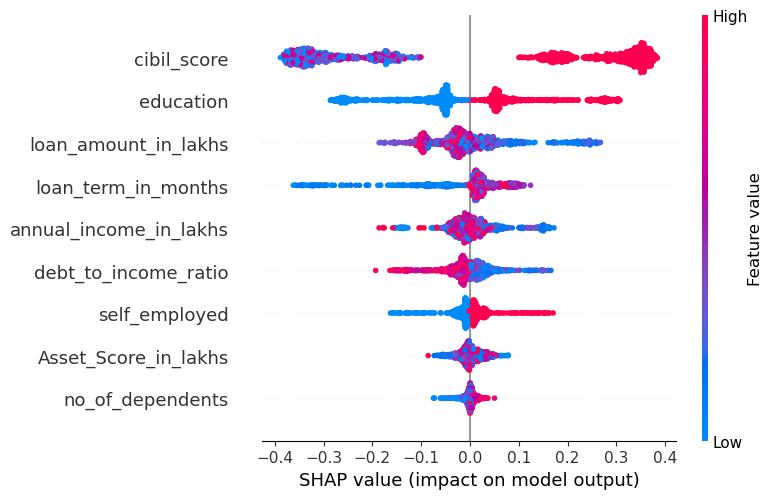

In [14]:
shap.summary_plot(shap_values_rf[:,:,1], x_test_scaled_df)

# SHAP Bar Plot (Mean Absolute SHAP Value)

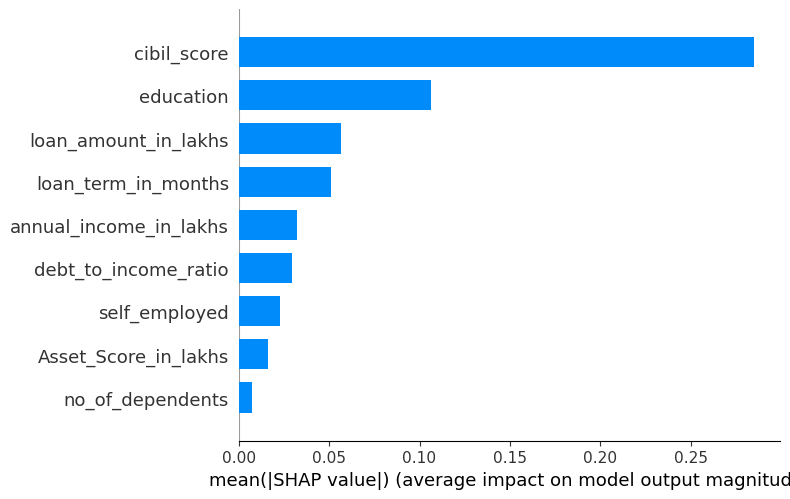

In [15]:
shap.summary_plot(shap_values_rf[:,:,1], x_test_scaled_df, plot_type = "bar")

# SHAP Force Plot (Local Explanation for Individual Prediction)

In [16]:
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[0,:,1], x_test_scaled_df.iloc[0])

# SHAP Dependence Plot (Effect of Feature Value)

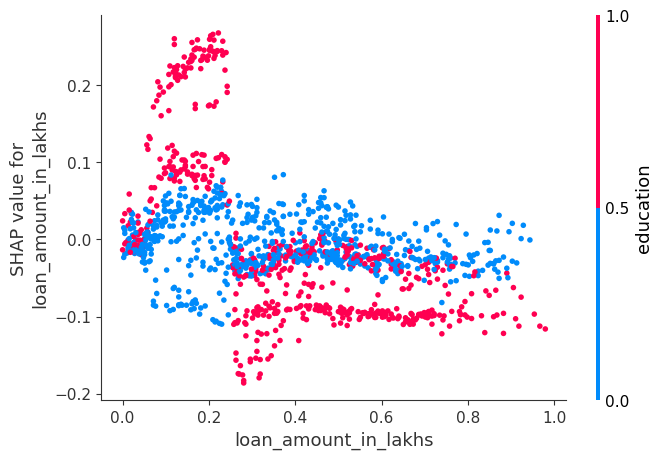

In [17]:
# Pick any important feature from summary plot

shap.dependence_plot("loan_amount_in_lakhs", shap_values_rf[:,:,1], x_test_scaled_df)